In [1]:
""" fd3d_1_1.py: 1D FDTD
Simulation in free space
"""
import numpy as np
from math import exp
from matplotlib import pyplot as plt


In [2]:
ke = 200
ex = np.zeros(ke)
hy = np.zeros(ke)


# Pulse parameters
kc = int(ke / 2)
t0 = 40
spread = 12
nsteps = 100


# Main FDTD Loop
for time_step in range(1, nsteps + 1):
    # Calculate the Ex field
    for k in range(1, ke):
        ex[k] = ex[k] + 0.5 * (hy[k - 1] - hy[k])
        
        # Put a Gaussian pulse in the middle
        pulse = exp(-0.5 * ((t0 - time_step) / spread) ** 2)
        hy[kc] = pulse
    
    
    # Calculate the Hy field
    for k in range(ke - 1):
        hy[k] = hy[k] + 0.5 * (ex[k] - ex[k + 1])


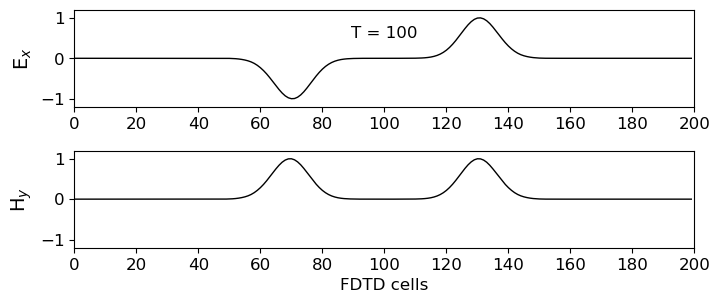

In [ ]:

plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 3.5))
plt.subplot(211)
plt.plot(ex, color='k', linewidth=1)
plt.ylabel('E$_x$', fontsize='14')
plt.xticks(np.arange(0, 201, step=20))
plt.xlim(0, 200)
plt.yticks(np.arange(-1, 1.2, step=1))
plt.ylim(-1.2, 1.2)
plt.text(100, 0.5, 'T = {}'.format(time_step),
horizontalalignment='center')
plt.subplot(212)
plt.plot(hy, color='k', linewidth=1)
plt.ylabel('H$_y$', fontsize='14')
plt.xlabel('FDTD cells')
plt.xticks(np.arange(0, 201, step=20))
plt.xlim(0, 200)
plt.yticks(np.arange(-1, 1.2, step=1))
plt.ylim(-1.2, 1.2)
plt.subplots_adjust(bottom=0.2, hspace=0.45)
plt.show()